In [56]:
import os 
import json 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
plt.rcParams['figure.figsize'] = [12,10] #default fig size 

In [2]:
### Intialize data ### 
data_file = 'bioprint-data.json' #change if json file is outisde of CWD
path = os.path.join(os.getcwd(), data_file)
with open(path) as json_data:
    data = json.load(json_data) #store json data as string 
data = pd.io.json.json_normalize(data) #convert to pandas dataframe for speed and ease 

In [3]:
def col_rename(): #rename columns for easy handling 
    cols = [] 
    for col in data.columns:
        arr = (str(col).split('.'))
        new_col = '_'.join(arr)
        cols.append(new_col)
    data.columns = cols
col_rename()

In [4]:
serial_num = 4
slice = data.ix[data['user_info_serial'] == serial_num] #only look at user of interst 

#filter key values for table 	
slice_mean = slice.mean()
slice_max = slice.max()
slice_min = slice.min()
table = pd.DataFrame(data=[slice_mean, slice_max,slice_min],
                            index = ['avg', 'max', 'min'])

In [5]:
print_data_cols = []
print_info_cols = []
user_info = []

for col in table.columns: 
    if 'print_data' in col:
        print_data_cols.append(col)
    elif 'print_info' in col:
        print_info_cols.append(col)
    elif 'user_info' in col:
        user_info.append(col)
    else:
        pass 
    
print_data = pd.DataFrame(table, columns=print_data_cols)
print_info = pd.DataFrame(table, columns=print_info_cols)
user_info = pd.DataFrame(table, columns=user_info)


In [64]:
data.columns

Index([u'print_data_deadPercent', u'print_data_elasticity',
       u'print_data_livePercent', u'print_info_crosslinking_cl_duration',
       u'print_info_crosslinking_cl_enabled',
       u'print_info_crosslinking_cl_intensity', u'print_info_files_input',
       u'print_info_files_output', u'print_info_pressure_extruder1',
       u'print_info_pressure_extruder2', u'print_info_resolution_layerHeight',
       u'print_info_resolution_layerNum', u'print_info_wellplate',
       u'user_info_email', u'user_info_serial'],
      dtype='object')

In [7]:

for col in print_info.columns:
    print col


print_info_crosslinking_cl_duration
print_info_crosslinking_cl_enabled
print_info_crosslinking_cl_intensity
print_info_files_input
print_info_files_output
print_info_pressure_extruder1
print_info_pressure_extruder2
print_info_resolution_layerHeight
print_info_resolution_layerNum
print_info_wellplate


print_data_deadPercent


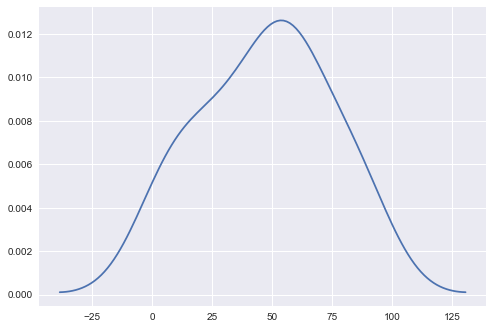

print_data_elasticity


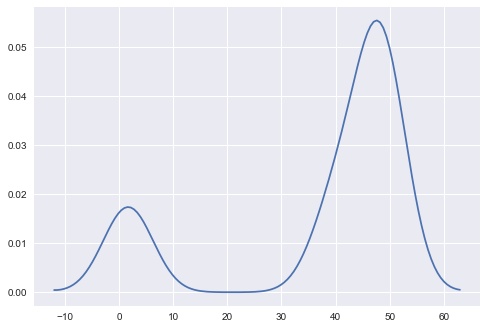

print_data_livePercent


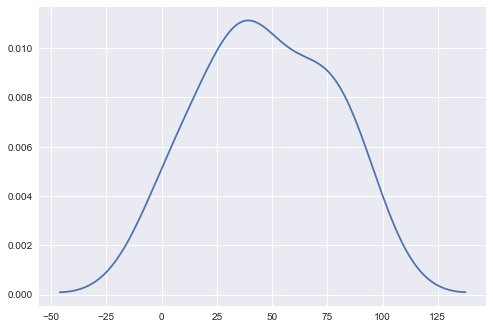

print_info_crosslinking_cl_duration


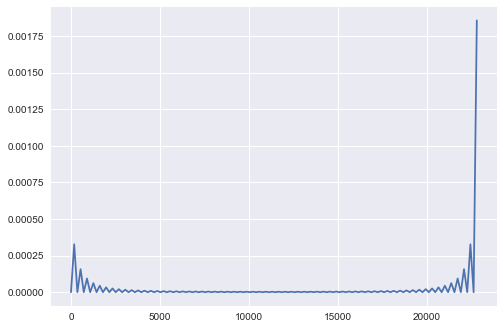

print_info_crosslinking_cl_enabled


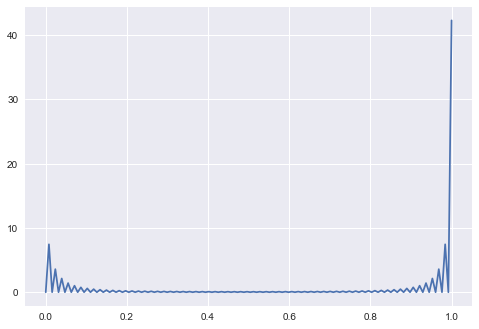

print_info_crosslinking_cl_intensity


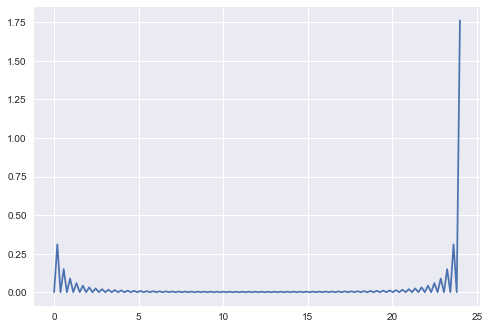

print_info_pressure_extruder1


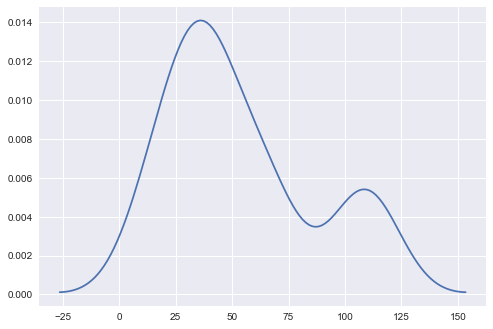

print_info_pressure_extruder2


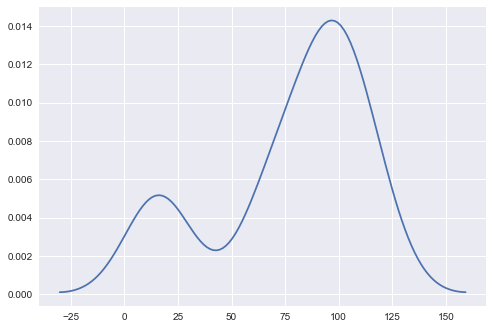

print_info_resolution_layerHeight


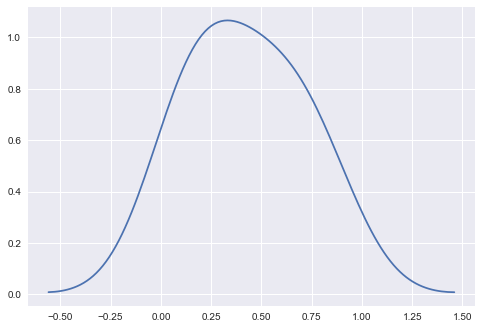

print_info_resolution_layerNum


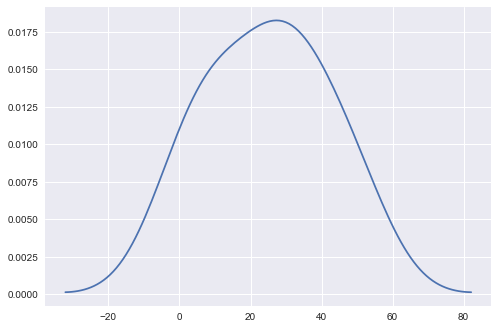

print_info_wellplate


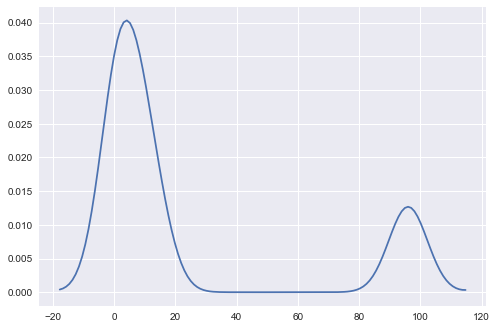

user_info_serial


C:\Users\mohit\Anaconda2\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Users\mohit\Anaconda2\lib\site-packages\statsmodels\nonparametric\kdetools.py:32: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


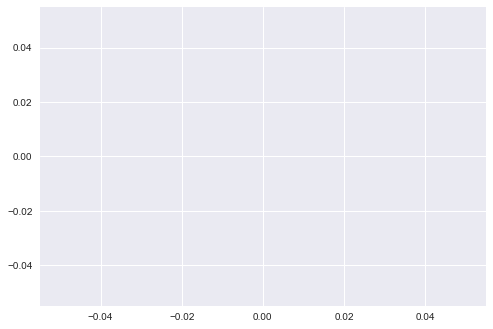

In [35]:
drop_cols = [] #remove cols with strings (cant do analysis on these)
for col in data.columns:
#     print col
    t = str(type(data[col].values[0]))
    if 'uni' in t:
        drop_cols.append(col)
num_data = data.drop(labels=drop_cols, axis=1)  
num_data
for col in num_data:
    print col
    sb.kdeplot(data[col].values[:5])
    plt.show()

In [50]:
num_data;

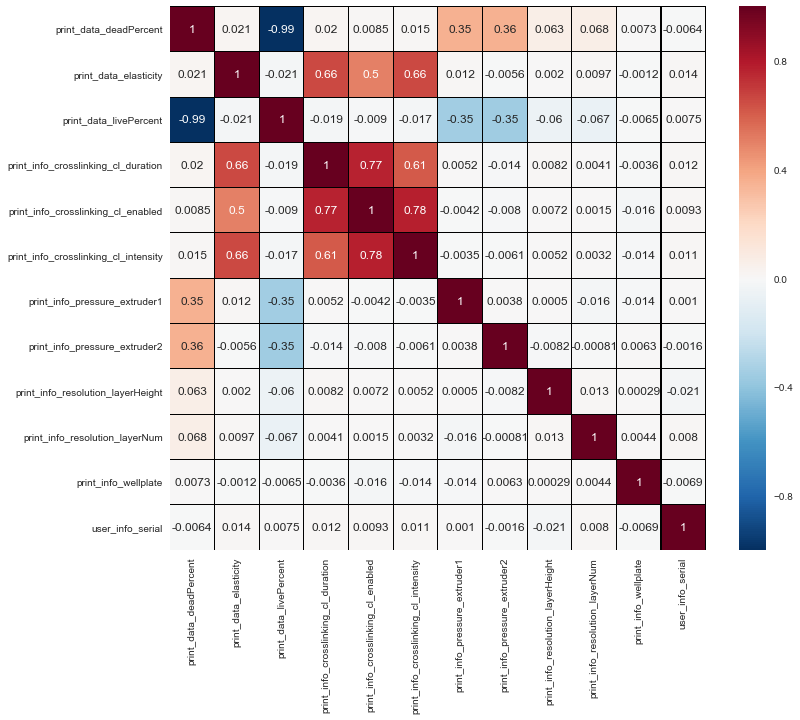

In [62]:
corr = num_data.corr()
sb.heatmap(corr, 
    xticklabels=corr.columns.values,
    yticklabels=corr.columns.values,
    annot=True,
    linewidths=0.1,
    linecolor='black',           
    )
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.show()
corr; #remove semicolon to view raw data

In [61]:
sb.heatmap?